# **Dimensionality Reduction Demystified for Beginners**

**필요 모듈 및 데이터 로딩**


*   breast_cancer 사용



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer
%matplotlib inline

cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

**사용할 함수(Helper Fundtions) 생성**


*   plot_labelled_scatter(X, y, class_labels, s) : 라벨링된 산점도 출력






In [3]:
def plot_labelled_scatter(X, y, class_labels,s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)

    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h,fontsize=15,frameon=False)

**차원 축소 Dimentsionality Reduction**



*   비지도 학습에서 중요한 역할을 함
*   데이터의 피처 수를 줄임
*   차원 줄여 데이터 세트 직관적으로 확인할 수 있음







# **Types of Simple Dimensionality Reduction Algorithms/Methods**


1. Principle Component Analysis (PCA)

*   차원들은 통계적으로 관련 없음
*   가장 유익한 정보를 제외하는 차원 제외하고 모두 드롭
*   처음 데이터를 확인할 때 유용함
*   시각화에 유용









2차원으로 차원 축소


*   PCA 적용 전, 데이터 정규화 필요
*   n_components = 2



In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


canc_norm = StandardScaler().fit(X_canc).transform(X_canc)

pca = PCA(n_components = 2).fit(canc_norm)

canc_pca = pca.transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before PCA : {}\n\nNumber of Features in Breast Cancer DataSet After PCA : {}'
      .format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in Breat Cancer DataSet Before PCA : 30

Number of Features in Breast Cancer DataSet After PCA : 2


2차원 - 산점도 시각화 가능
(helper function 사용)

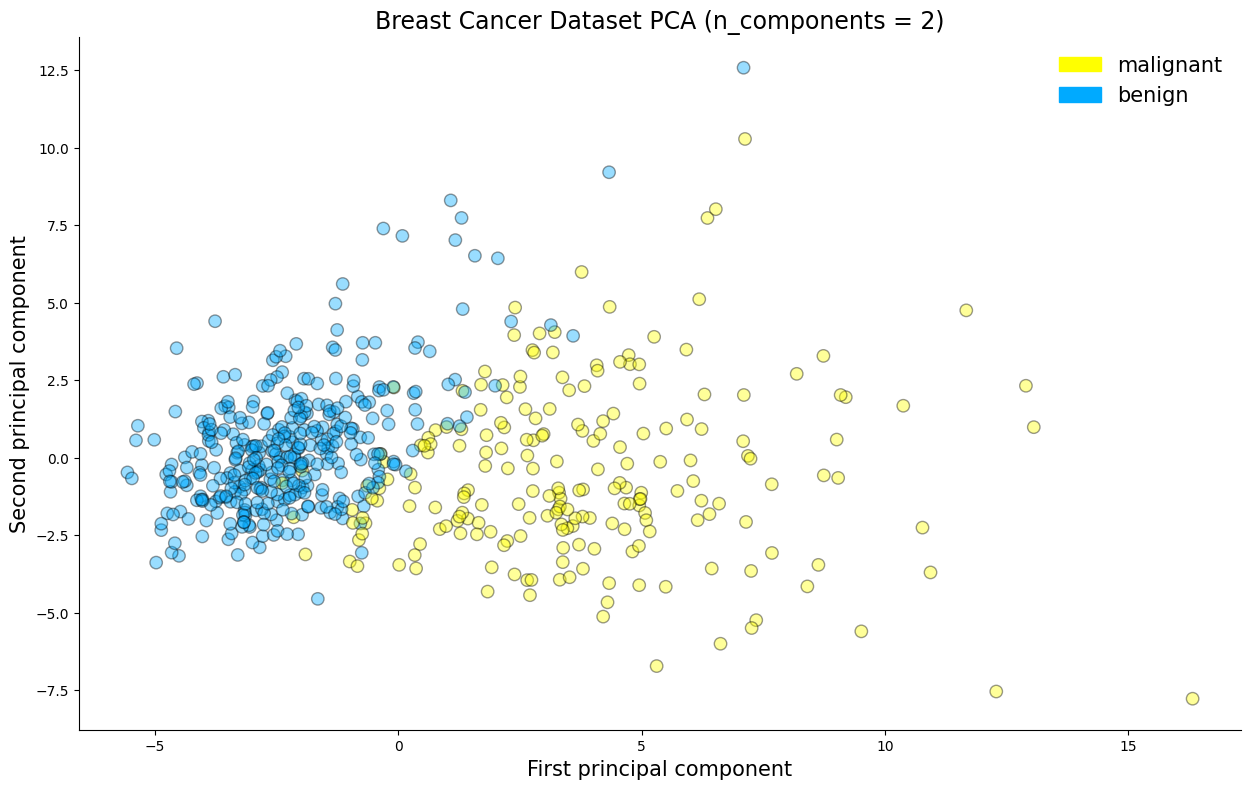

In [5]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant', 'benign'],(15,9))
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17);

피처간 상관관계 확인


*   .componenets : 모든 피처간의 Co-relation 값 저장
*   Heatmap 사용하여 시각화
*   양수-양의 상관관계(우상향), 음수-음의 상관관계를 가짐


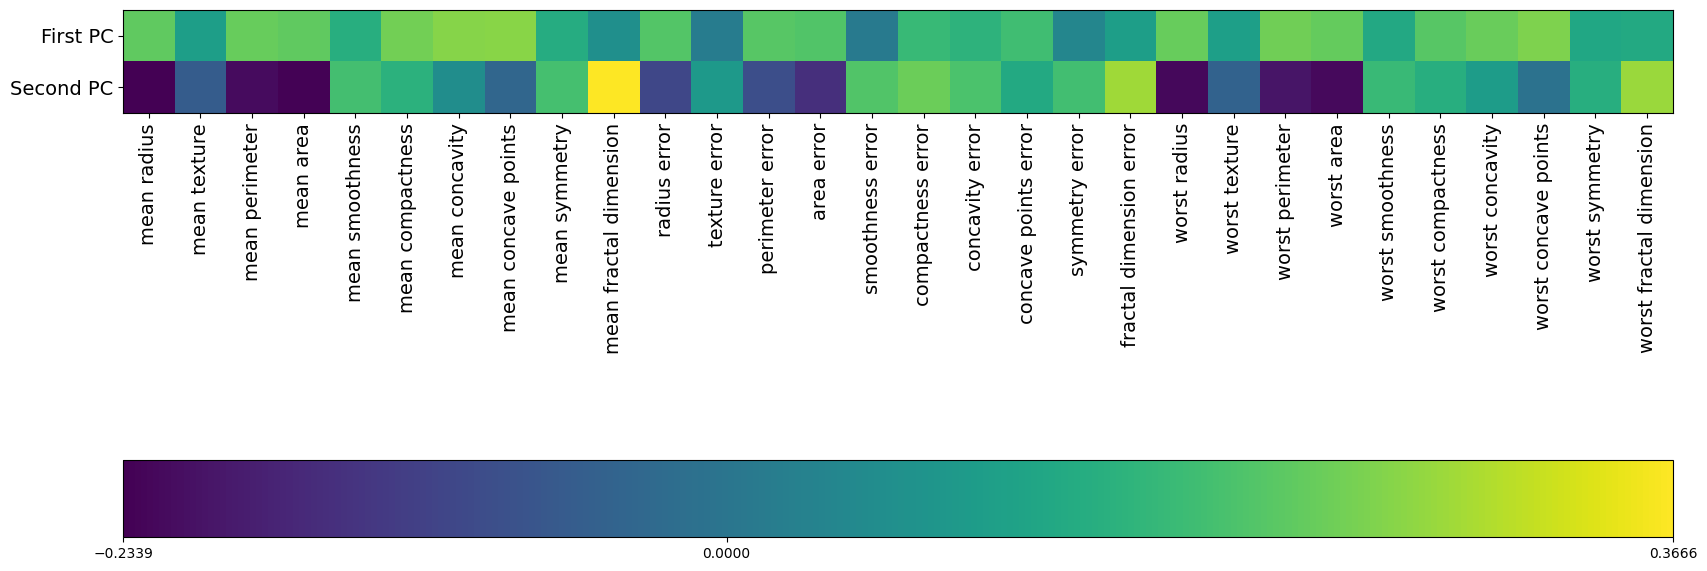

In [6]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14);
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.5);

2. Multi-dimensional Scaling (MDS)


*   Manifold Learning Algorithms 중 하나
*   고차원 데이터에 대해 좋은 저차원 구조 찾기
*   원본 데이터간의 거리 정보 보존/기반으로

PCA와 유사하지만 사용되는 내부의 수학적 모델이 다름


Breast Cancer Datasets에 MDS 적용

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


Text(0.5, 1.0, 'Breast Cancer Dataset MDS (n_components = 2)')

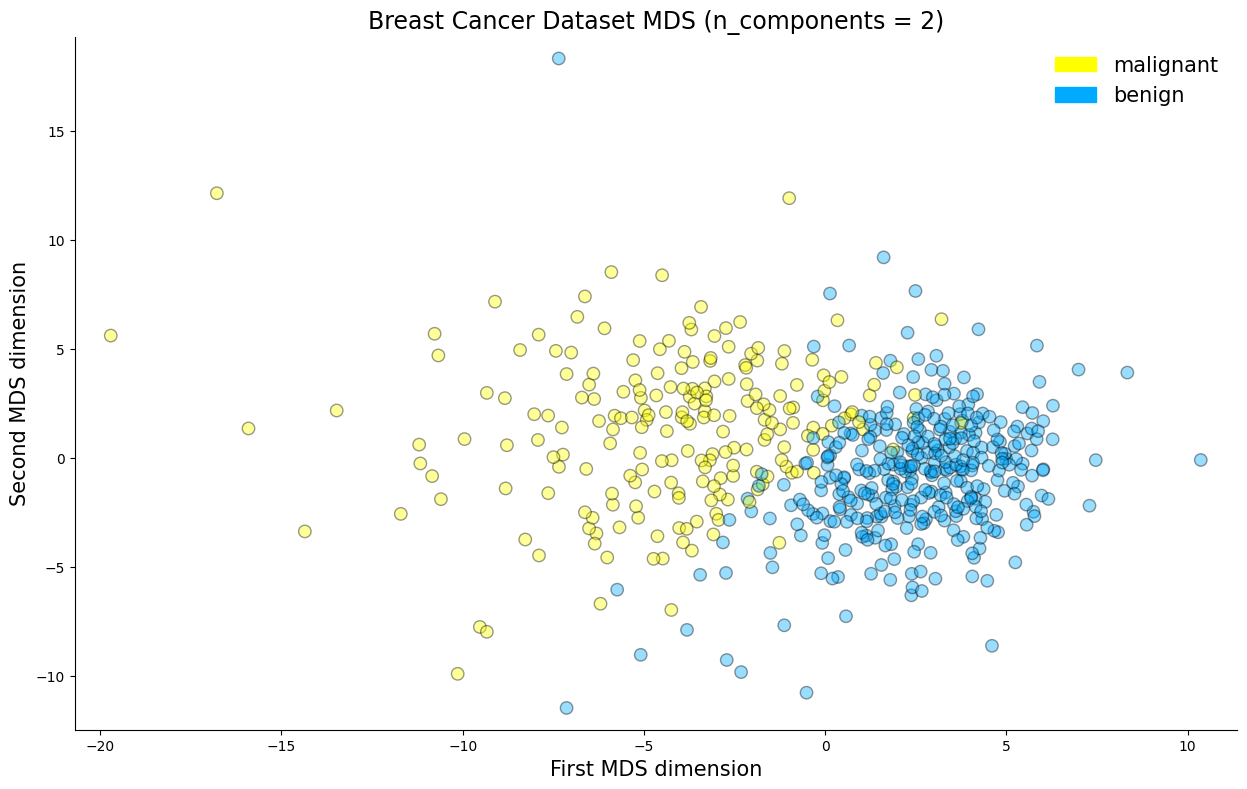

In [7]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2,random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17)

3. T-distributed Stochastic Neighbor Embedding (t-SNE)


*   2차원 데이터 시각화에 유용
*   데이터간의 가까움, 이웃한 정도 반영
*   well-defined local structure 에 잘 작동함



Breast Cancer Dataset에 T-SNE 적용

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


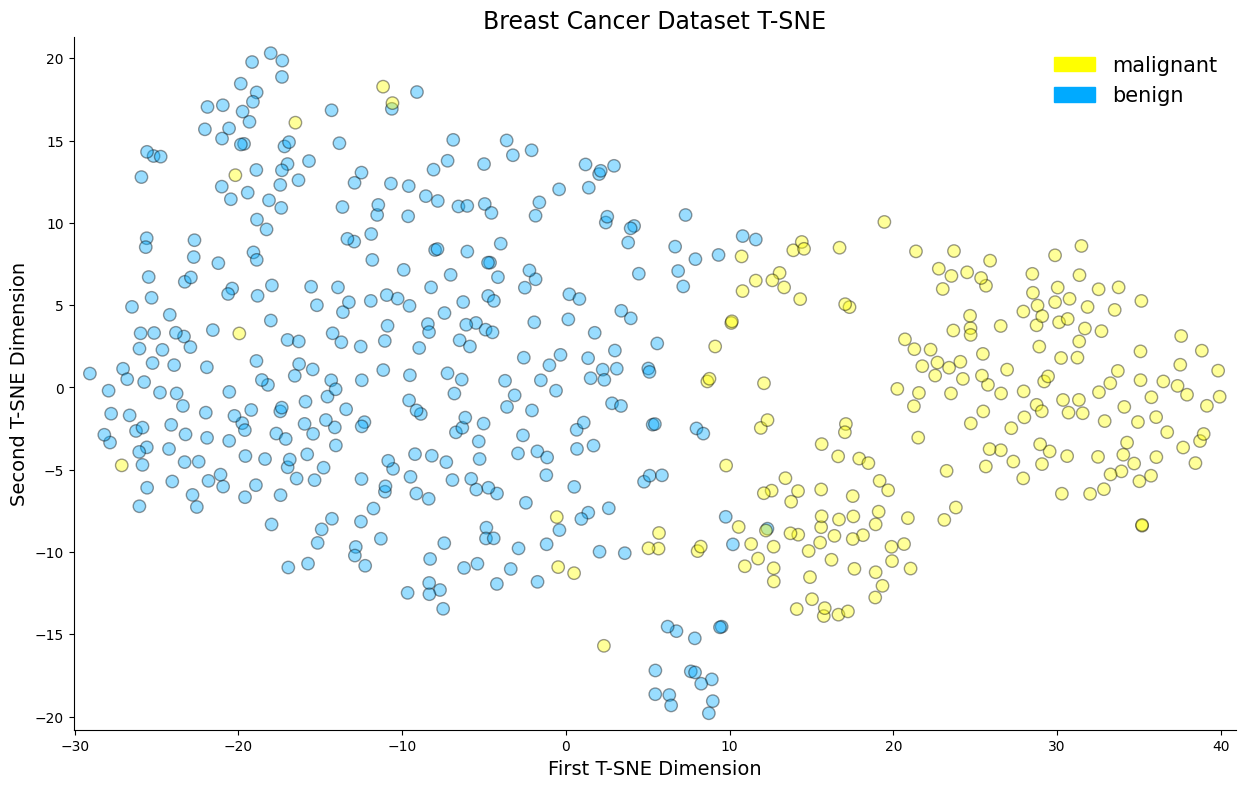

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);